In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('../data/processed/spotify_total.csv', index_col='track_id')
df.head()

,track_name,artist_name,track_popularity,explicit,artist_popularity,artist_followers,album_total_tracks,track_duration_min
track_id,,,,,,,,
3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),Diplo,0,1,77.0,2812821.0,9,1.55
1oQW6G2ZiwMuHqlPpP27DB,OMG!,Yelawolf,0,1,64.0,2363438.0,1,3.07
7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,Riff Raff,4,1,48.0,193302.0,1,2.55
67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),Diplo,30,1,77.0,2813710.0,9,1.69
15xptTfRBrjsppW0INUZjf,ride me like a harley,Rumelis,0,1,48.0,8682.0,2,2.39


In [2]:
X = df.drop(['track_name', 'artist_name', 'track_popularity'], axis=1)
y = df['track_popularity']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

El modelo se equivoca, en promedio, por 8.02 puntos de popularidad.
Precisión del modelo (R2): 0.71


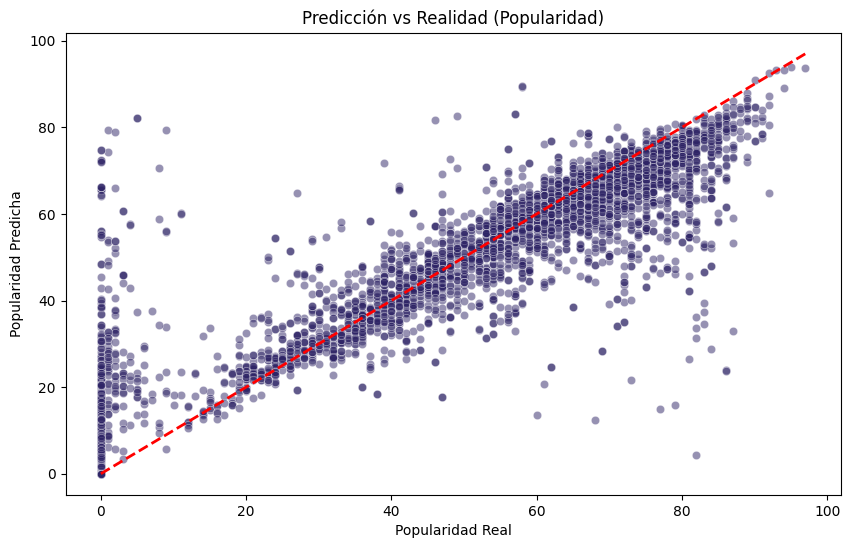

In [4]:
predicciones = modelo.predict(X_test)
error = mean_absolute_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f'El modelo se equivoca, en promedio, por {error:.2f} puntos de popularidad.')
print(f'Precisión del modelo (R2): {r2:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predicciones, alpha=0.5, color='#2e2466',)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Predicción vs Realidad (Popularidad)')
plt.xlabel('Popularidad Real')
plt.ylabel('Popularidad Predicha')
plt.show()

In [5]:
import joblib

joblib.dump(modelo, '../src/predictor_model.pkl')
joblib.dump(X.columns.tolist(), '../src/model_columns.pkl')

print('Modelo guardado')

Modelo guardado


In [6]:
def prueba(datos_nueva_cancion):
    modelo_cargado = joblib.load('../src/predictor_model.pkl')
    columnas = joblib.load('../src/model_columns.pkl')
    
    entrada = pd.DataFrame([datos_nueva_cancion], columns=columnas)
    resultado = modelo_cargado.predict(entrada)
    return resultado[0]

prueba_track = [0, 70, 100000, 10, 5]
score = prueba(prueba_track)

print(f'La popularidad estimada para esta canción es: {score}')

La popularidad estimada para esta canción es: 49.25
